<font size="+3"><strong> Clustering with Two Features</strong></font>

In the previous lesson, you explored data from the [Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) (SCF), paying special attention to households that have been turned down for credit or feared being denied credit. In this lesson, we'll build a model to segment those households into distinct clusters, and examine the differences between those clusters. 

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import wqet_grader
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from teaching_tools.widgets import ClusterWidget, SCFClusterWidget


# Prepare Data

## Import

Just like always, we need to begin by bringing our data into the project. We spent some time in the previous lesson working with a subset of the larger SCF dataset called `"TURNFEAR"`. Let's start with that.

**Task 6.2.1:** Create a `wrangle` function that takes a path of a CSV file as input, reads the file into a DataFrame, subsets the data to households that have been turned down for credit or feared being denied credit in the past 5 years (see `"TURNFEAR"`), and returns the subset DataFrame. 

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    mask = df["TURNFEAR"] == 1
    df = df[mask]
    return df

And now that we've got that taken care of, we'll import the data and see what we've got.

**Task 6.2.2:** Use your `wrangle` function to read the file `SCFP2019.csv.gz` into a DataFrame named `df`.


In [3]:
df = wrangle("data/SCFP2019.csv.gz")
print(df.shape)
df.head()

(4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## Explore

We looked at a lot of different features of the `"TURNFEAR"` subset in the last lesson, and the last thing we looked at was the relationship between real estate and debt. To refresh our memory on what that relationship looked like, let's make that graph again.

**Task 6.2.3:** Create a scatter plot of that shows the total value of primary residence of a household (`"HOUSES"`) as a function of the total value of household debt (`"DEBT"`). Be sure to label your x-axis as `"Household Debt"`, your y-axis as `"Home Value"`, and use the title `"Credit Fearful: Home Value vs. Household Debt"`.


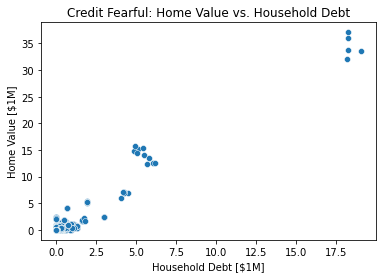

In [4]:
# Plot "HOUSES" vs "DEBT"
sns.scatterplot(x=df['DEBT']/1e6, y=df['HOUSES']/1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

## Split

We need to split our data, but we're not going to need target vector or a test set this time around. That's because the model we'll be building involves *unsupervised* learning. It's called *unsupervised* because the model doesn't try to map input to a st of labels or targets that already exist. It's kind of like how humans learn new skills, in that we don't always have models to copy. Sometimes, we just try out something and see what happens. Keep in mind that this doesn't make these models any less useful, it just makes them different.

So, keeping that in mind, let's do the split.

**Task 6.2.4:** Create the feature matrix `X`. It should contain two features only: `"DEBT"` and `"HOUSES"`.

In [5]:
X = df[["DEBT","HOUSES"]]
print(X.shape)
X.head()

(4623, 2)


,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


# Build Model

In [6]:
cw = ClusterWidget(n_clusters=3)
cw.show()

In [7]:
scfc = SCFClusterWidget(x=df["DEBT"], y=df["HOUSES"], n_clusters=3)
scfc.show()

**Task 6.2.7:** Build a `KMeans` model, assign it to the variable name `model`, and fit it to the training data `X`. 


In [8]:
# Build model
model = KMeans(n_clusters=3, random_state=42)
# Fit model to data
model.fit(X)

KMeans(n_clusters=3, random_state=42)

**Task 6.2.8:** Extract the labels that your `model` created during training and assign them to the variable `labels`.

In [9]:
labels = model.labels_
labels[200:]

array([0, 0, 0, ..., 0, 0, 0])

to know the indices of labels

In [11]:

index = labels.tolist().index(0)
print(index)

indices = np.where(labels == 0)[0]
print(indices)

indices = np.where(labels == 1)[0]
print(indices)

indices = np.where(labels == 2)[0]
print(indices)

indices = np.where(labels == 3)[0]
print(indices)

0
[   0    1    2 ... 4620 4621 4622]
[230 231 232 233 234]
[1345 1346 1347 1348 1349 3323 3324 3325 3326 3327 3598 3599 3600 3601
 3602]
[]


Using the labels we just extracted, let's recreate the scatter plot from before, this time we'll color each point according to the cluster to which the model assigned it.

**Task 6.2.9:** Recreate the "Home Value vs. Household Debt" scatter plot you made above, but with two changes. First, use seaborn to create the plot. Second, pass your `labels` to the `hue` argument, and set the `palette` argument to `"deep"`. 


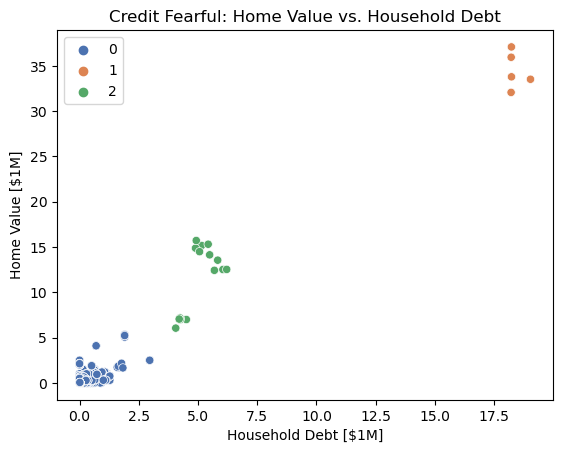

In [20]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(
    x=df['DEBT']/1e6,
    y=df['HOUSES']/1e6,
    hue=labels,   # determines the variable used for coloring the data points in the scatter plot.
    palette="deep" # This sets the color palette to be used for the scatter plot
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Nice! Each cluster has its own color. The centroids are still missing, so let's pull those out.

**Task 6.2.10:** Extract the centroids that your `model` created during training, and assign them to the variable `centroids`. 


In [21]:
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328699],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

**Task 6.2.11:** Recreate the seaborn "Home Value vs. Household Debt" scatter plot you just made, but with one difference: Add the `centroids` to the plot. Be sure to set the centroids color to `"gray"`.

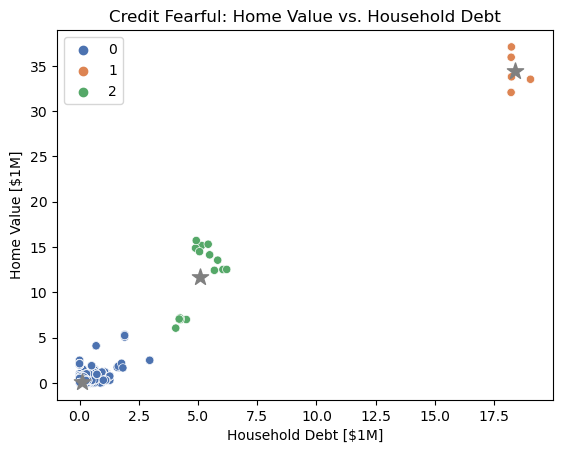

In [22]:
# Plot "HOUSES" vs "DEBT", add centroids
sns.scatterplot(
    x=df['DEBT']/1e6,
    y=df['HOUSES']/1e6,
    hue=labels,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0] / 1e6,
    y=centroids[:, 1] / 1e6,
    color='gray',
    marker="*",
    s=150
      
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

That looks great, but let's not pat ourselves on the back just yet. Even though our graph makes it *look* like the clusters are correctly assigned but, as data scientists, we need a numerical evaluation. The data we're using is pretty clear-cut, but if things were a little more muddled, we'd want to run some calculations to make sure we got everything right.



## Clustering Metrics

To see whether our clustering algorithm performs well, we need more than a scatter plot. The two common metrics we used are **inertia** and **silhouette score**. These metrics will also be helpful in determining the number of clusters to use.

### Inertia

**Inertia** is the within-cluster sum of square distance, which is used in k-means algorithm's objective function. Mathematically, inertia is equal to

$$ \sum_{k} \sum_{X_j \in  C_k} \| X_j  - \mu_k \|^2, $$

where $\mu_k$ is the centroid of cluster $k$ and $C_k$ is the set of points assigned to cluster $k$. Basically, the inertia is the sum of the distance of each point to the centroid or center of its assigned cluster. A lower inertia means the points assigned to the clusters are closer to the centroid.

### Silhouette Score

**Silhouette Coefficient** is a measure of how dense and separated are the clusters. The silhouette coefficient is a property assigned to each data point. It's equal to

$$ \frac{b - a}{\max(a, b)}, $$

where $a$ is the distance between a point and centroid of its assigned cluster; $b$  is the distance between the point and the centroid of the nearest neighboring cluster (i.e. the closest cluster the point is not assigned to).

The silhouette coefficient ranges from -1 to 1. If a point is really close to the centroid of its assigned cluster, then $a \ll b$ and the silhouette coefficient will be approximately equal to 1. If the reverse is true, $a \gg b$, then the coefficient will be -1. If the point could have been assigned to either cluster, its coefficient will be 0.

Higher silhouette coefficient means higher density and highly separated clusters. This is because we want to have lower $a$ (close to assigned cluster's centroid) and higher $b$ (far away from unassigned cluster's centroid). A lower $a$ value combined with higher $b$ value will produce a higher silhouette score.

**Task 6.2.12:** Extract the inertia for your `model` and assign it to the variable `inertia`.


In [23]:
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 939554010797046.9


The "best" inertia is 0, and our score is pretty far from that. Does that mean our model is "bad?" Not necessarily. Inertia is a measurement of distance (like mean absolute error from Project 2). This means that the unit of measurement for inertia depends on the unit of measurement of our x- and y-axes. And since `"DEBT"` and `"HOUSES"` are measured in tens of millions of dollars, it's not surprising that inertia is so large. 

However, it would be helpful to have metric that was easier to interpret, and that's where **silhouette score** comes in. Silhouette score measures the distance *between different clusters*. It ranges from -1 (the worst) to 1 (the best), so it's easier to interpret than inertia.

**Task 6.2.13:** Calculate the silhouette score for your model and assign it to the variable `ss`.


In [25]:
ss = silhouette_score(X,model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.9768842462944348


Outstanding! 0.976 is pretty close to 1, so our model has done a good job at identifying 3 clusters that are far away from each other.

It's important to remember that these performance metrics are the result of the number of clusters we told our model to create. In unsupervised learning, the number of clusters is hyperparameter that you set before training your model. So what would happen if we change the number of clusters? Will it lead to better performance? Let's try!

**Task 6.2.14:** Use a `for` loop to build and train a K-Means model where `n_clusters` ranges from 2 to 12 (inclusive). Each time a model is trained, calculate the inertia and add it to the list `inertia_errors`, then calculate the silhouette score and add it to the list `silhouette_scores`.

In [26]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # build model
    model = KMeans(n_clusters=k, random_state=42)
    # trian model 
    model.fit(X)
    # calculate the inertia
    inertia_errors.append(model.inertia_)
    # calculate ss
    silhouette_scores.append(silhouette_score(X,model.labels_))

print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [3018038313336920.0, 939554010797046.9, 546098841715654.56, 309310386410920.3, 235243397481789.06, 182225729179699.88, 150670779013795.2, 114321995931020.75, 100340259483917.19, 86229997033602.47, 74757234072100.47]

Silhouette Scores: [0.9855099957519555, 0.9768842462944348, 0.9490311483406091, 0.839330043242819, 0.7287406719898627, 0.726989114305748, 0.7263840026889208, 0.7335125606476427, 0.692157992955073, 0.6949309528556856, 0.6951831031001252]


**Task 6.2.15:** Create a line plot that shows the values of `inertia_errors` as a function of `n_clusters`. Be sure to label your x-axis `"Number of Clusters"`, your y-axis `"Inertia"`, and use the title `"K-Means Model: Inertia vs Number of Clusters"`.


Text(0.5, 1.0, 'K-Means Model: Inertia vs Number of Clusters')

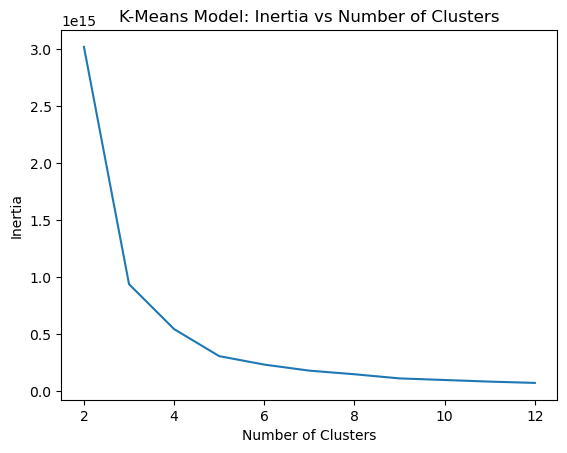

In [27]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters,inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters")

What we're seeing here is that, as the number of clusters increases, inertia goes down. In fact, we could get inertia to 0 if we told our model to make 4,623 clusters (the same number of observations in `X`), but those clusters wouldn't be helpful to us.

The trick with choosing the right number of clusters is to look for the "bend in the elbow" for this plot. In other words, we want to pick the point where the drop in inertia becomes less dramatic and the line begins to flatten out. In this case, it looks like the sweet spot is 4 or 5. 

Let's see what the silhouette score looks like. 

**Task 6.2.16:** Create a line plot that shows the values of `silhouette_scores` as a function of `n_clusters`. Be sure to label your x-axis `"Number of Clusters"`, your y-axis `"Silhouette Score"`, and use the title `"K-Means Model: Silhouette Score vs Number of Clusters"`.

Text(0.5, 1.0, 'K-Means Model: Silhouette Score vs Number of Clusters')

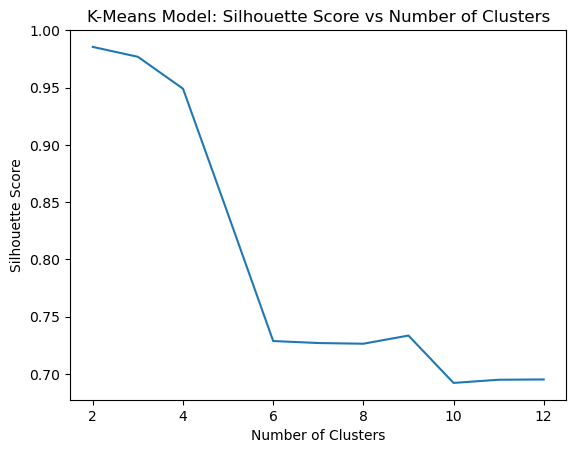

In [28]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters,silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters")

Note that, in contrast to our inertia plot, bigger is better. So we're not looking for a "bend in the elbow" but rather a number of clusters for which the silhouette score still remains high. We can see that silhouette score drops drastically beyond 4 clusters. Given this and what we saw in the inertia plot, it looks like the optimal number of clusters is 4. 

Now that we've decided on the final number of clusters, let's build a final model.

**Task 6.2.17:** Build and train a new k-means model named `final_model`. Use the information you gained from the two plots above to set an appropriate value for the `n_clusters` argument. Once you've built and trained your model, submit it to the grader for evaluation.

In [29]:
# Build model
final_model = KMeans(n_clusters=4, random_state=42)
# Fit model to data
final_model.fit(X)

KMeans(n_clusters=4, random_state=42)

# Communicate

**Task 6.2.18:** Create one last "Home Value vs. Household Debt" scatter plot that shows the clusters that your `final_model` has assigned to the training data. 


In [30]:
centroids=final_model.cluster_centers_

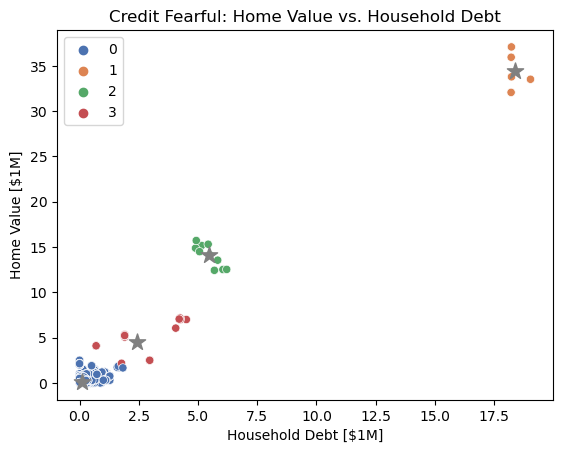

In [31]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(
    x=df["DEBT"]/1e6,
    y=df["HOUSES"]/1e6,
    hue=final_model.labels_,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0] / 1e6,
    y=centroids[:, 1] / 1e6,
    color='gray',
    marker="*",
    s=150
      
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Nice! You can see all four of our clusters, each differentiated from the rest by color.

We're going to make one more visualization, converting the cluster analysis we just did to something a little more actionable: a side-by-side bar chart. In order to do that, we need to put our clustered data into a DataFrame.

**Task 6.2.19:** Create a DataFrame `xgb` that contains the mean `"DEBT"` and `"HOUSES"` values for each of the clusters in your `final_model`.


In [32]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,8.488629e+04,1.031872e+05
1,1.838410e+07,3.448400e+07
2,5.472800e+06,1.407400e+07
3,2.420929e+06,4.551429e+06


**Task 6.2.20:** Create a side-by-side bar chart from `xgb` that shows the mean `"DEBT"` and `"HOUSES"` values for each of the clusters in your `final_model`. For readability, you'll want to divide the values in `xgb` by 1 million. Be sure to label the x-axis `"Cluster"`, the y-axis `"Value [$1 million]"`, and use the title `"Mean Home Value & Household Debt by Cluster"`.

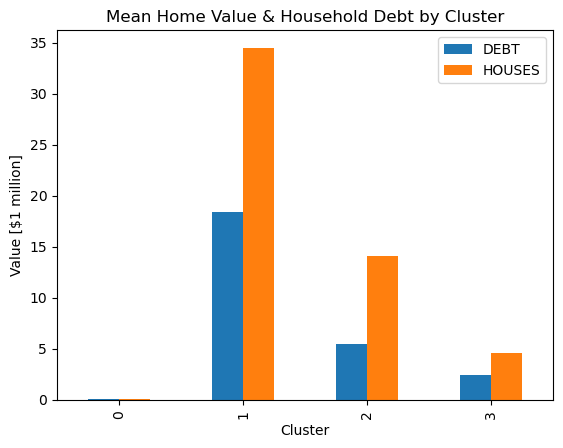

In [33]:
# Create side-by-side bar chart of `xgb`
(xgb/1e6).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");

Text(0.5, 1.0, 'proportion of debt to home value')

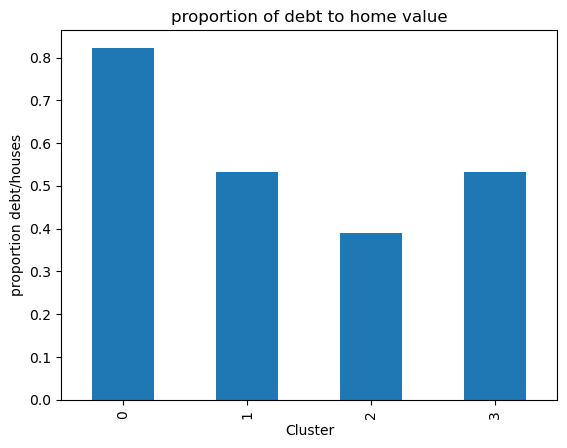

In [34]:
(xgb["DEBT"]/xgb["HOUSES"]).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("proportion debt/houses")
plt.title("proportion of debt to home value")